In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSCE464/datasets/Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Dataset Preprocessing

In [ ]:
#Convert categorical values into numerical values
df['Gender'] = df['Gender'].map({'female': 1, 'male': 0})

#Fill NaN in the age colum with the average age
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

#Apply the one-hot encoding to the Pclass column
df['FirstClass'] = df['Pclass'].apply(lambda x: 1 if x == 1 else 0)
df['SecondClass'] = df['Pclass'].apply(lambda x: 1 if x == 2 else 0)
df['ThirdClass'] = df['Pclass'].apply(lambda x: 1 if x == 3 else 0)

x_data = df[['Gender', 'Age', 'FirstClass', 'SecondClass', 'ThirdClass']]
y_data = df[['Survived']]

In [ ]:
x_data

,Gender,Age,FirstClass,SecondClass,ThirdClass
0,0,22.000000,0,0,1
1,1,38.000000,1,0,0
2,1,26.000000,0,0,1
3,1,35.000000,1,0,0
4,0,35.000000,0,0,1
...,...,...,...,...,...
886,0,27.000000,0,1,0
887,1,19.000000,1,0,0
888,1,29.699118,0,0,1
889,0,26.000000,1,0,0


In [ ]:
y_data

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Split the Preprocessed Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
x_train.reset_index(drop=True, inplace=True)

In [ ]:
x_train

,Gender,Age,FirstClass,SecondClass,ThirdClass
0,0,28.000000,1,0,0
1,0,0.830000,0,1,0
2,1,4.000000,0,0,1
3,1,8.000000,0,1,0
4,0,29.699118,0,0,1
...,...,...,...,...,...
707,0,30.000000,0,1,0
708,0,49.000000,1,0,0
709,0,26.000000,1,0,0
710,1,14.000000,1,0,0


In [ ]:
y_train.reset_index(drop=True, inplace=True)

In [ ]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,1
...,...
707,0
708,0
709,1
710,1


In [ ]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
x_test

,Gender,Age,FirstClass,SecondClass,ThirdClass
0,0,1.000000,0,0,1
1,1,45.000000,0,0,1
2,1,29.699118,0,0,1
3,0,24.000000,1,0,0
4,0,9.000000,0,0,1
...,...,...,...,...,...
174,0,29.699118,0,0,1
175,1,29.000000,0,1,0
176,0,27.000000,0,1,0
177,0,28.000000,0,0,1


In [ ]:
y_test

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
174,0
175,1
176,0
177,0


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.73561236, -2.17871687, -0.56653751, -0.49252705,  0.88317609],
       [ 1.35941164,  1.15320152, -0.56653751, -0.49252705,  0.88317609],
       [ 1.35941164, -0.00546419, -0.56653751, -0.49252705,  0.88317609],
       [-0.73561236, -0.43703226,  1.76510819, -0.49252705, -1.13227703],
       [-0.73561236, -1.57291352, -0.56653751, -0.49252705,  0.88317609],
       [ 1.35941164, -0.73993393, -0.56653751, -0.49252705,  0.88317609],
       [ 1.35941164, -0.209856  , -0.56653751,  2.03034533, -1.13227703],
       [-0.73561236, -0.73993393, -0.56653751, -0.49252705,  0.88317609],
       [-0.73561236,  1.22892693,  1.76510819, -0.49252705, -1.13227703],
       [-0.73561236,  1.38037777,  1.76510819, -0.49252705, -1.13227703],
       [-0.73561236,  0.62312359,  1.76510819, -0.49252705, -1.13227703],
       [-0.73561236, -0.43703226, -0.56653751, -0.49252705,  0.88317609],
       [-0.73561236, -0.209856  , -0.56653751, -0.49252705,  0.88317609],
       [-0.73561236, -1.0428356 , -0.5

# Build the Scikit-Learn Model

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print("Train Acc: ", model.score(x_train, y_train))

Train Acc:  0.7893258426966292


In [ ]:
print("Test Acc: ", model.score(x_test, y_test))

Test Acc:  0.8100558659217877


In [ ]:
#Check which feature has the most significant impact (Feature Importance)
print(model.coef_)

[[ 1.21801704 -0.37622133  0.4827299   0.0962669  -0.49417226]]


# Prediction

In [ ]:
Jack = np.array([0.0, 20.0, 0.0, 0.0, 1.0])
Rose = np.array([1.0, 17.0, 1.0, 0.0, 0.0])
ME = np.array([0.0, 41.0, 1.0, 0.0, 0.0])
sample_passengers = np.array([Jack, Rose, ME])

sample_passengers = scaler.transform(sample_passengers)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(model.predict(sample_passengers))

[0 1 0]


In [ ]:
print(model.predict_proba(sample_passengers))

[[0.88006125 0.11993875]
 [0.05920221 0.94079779]
 [0.61532554 0.38467446]]


# PyTorch Model

In [ ]:
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train.to_numpy())
y_test = torch.Tensor(y_test.to_numpy())

In [ ]:
x_train.shape

torch.Size([712, 5])

In [ ]:
x_test.shape

torch.Size([179, 5])

In [ ]:
y_train.shape

torch.Size([712, 1])

In [ ]:
y_test.shape

torch.Size([179, 1])

# High-Level Implementation

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(5, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier()

====Symmary of Model Training====
Epoch    0 Cost: 0.87 Training Acc: 26.83
Epoch  100 Cost: 0.46 Training Acc: 78.93
Epoch  200 Cost: 0.46 Training Acc: 78.93
Epoch  300 Cost: 0.46 Training Acc: 78.93
Epoch  400 Cost: 0.46 Training Acc: 78.93
Epoch  500 Cost: 0.46 Training Acc: 78.93
Epoch  600 Cost: 0.46 Training Acc: 78.93
Epoch  700 Cost: 0.46 Training Acc: 78.93
Epoch  800 Cost: 0.46 Training Acc: 78.93
Epoch  900 Cost: 0.46 Training Acc: 78.93
Epoch 1000 Cost: 0.46 Training Acc: 78.93


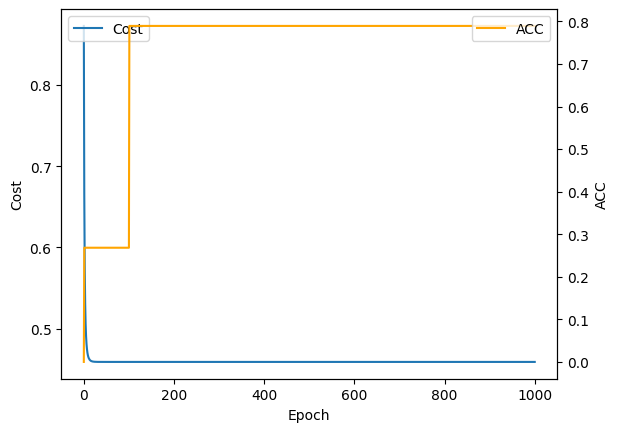

In [ ]:
x_axis = []
y1_axis = []
y2_axis = []
accuracy = 0

optimizer = optim.SGD(model.parameters(), lr=1.0)
print("====Symmary of Model Training====")

for epoch in range(1001):
  x = x_train
  y = y_train

  hypothesis = model(x)

  cost = F.binary_cross_entropy(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x_axis.append(epoch)
  y1_axis.append(cost.item())
  y2_axis.append(accuracy)

  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y
    accuracy = correct_prediction.sum() / len(correct_prediction)

    print("Epoch {:4d} Cost: {:.2f} Training Acc: {:.2f}".format(epoch, cost.item(), accuracy*100))

fig, x1 = plt.subplots()
x1.set_xlabel("Epoch")
x1.set_ylabel("Cost")
x1.plot(x_axis, y1_axis, label="Cost")
x1.legend(loc="upper left")

x2 = x1.twinx()
x2.set_ylabel("ACC")
x2.plot(x_axis, y2_axis, color="orange", label="ACC")
x2.legend(loc="upper right")

plt.show()

Model Testing

In [ ]:
with torch.no_grad():
  y = model(x_test)
  #output compared to actual answers
  cost_test = F.binary_cross_entropy(y, y_test)

  prediction = y >= torch.FloatTensor([0.5])
  correct_prediction = prediction.float() == y_test
  accuracy = correct_prediction.sum() / len(correct_prediction)

  print("Cost: {:.2f} Testing Accuracy: {:.2f}".format(cost.item(), accuracy*100))

Cost: 0.46 Testing Accuracy: 81.01


#PyTorch Prediction

In [ ]:
Jack = np.array([0.0, 20.0, 0.0, 0.0, 1.0]).reshape(1, 5)
Jack_normalization = scaler.transform(Jack)
Jack = torch.FloatTensor(Jack_normalization)

Rose = np.array([1.0, 17.0, 1.0, 0.0, 0.0]).reshape(1, 5)
Rose_normalization = scaler.transform(Rose)
Rose = torch.FloatTensor(Rose_normalization)

me = np.array([0.0, 19.0, 1.0, 0.0, 0.0]).reshape(1, 5)
me_normalization = scaler.transform(me)
me = torch.FloatTensor(me_normalization)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
hypothesis = model(Jack)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
if prediction == False:
  print("Jack did not survive")
else:
  print("Jack survived")

tensor([[0.1182]], grad_fn=<SigmoidBackward0>)
Jack did not survive


In [ ]:
hypothesis = model(Rose)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
if prediction == False:
  print("Rose did not survive")
else:
  print("Rose survived")

tensor([[0.9430]], grad_fn=<SigmoidBackward0>)
Rose survived


In [ ]:
hypothesis = model(me)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
if prediction == False:
  print("You did not survive")
else:
  print("You survived")

tensor([[0.5419]], grad_fn=<SigmoidBackward0>)
You survived
